# Classification


In [76]:
import pandas as pd
from sklearn.metrics import accuracy_score

import evaluation as eval
import classification_utils as class_utils
import copy

target = "playoff"

df = pd.read_csv("../data/transformed.csv")
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,confID,year,playoff
0,-4.117777,-1.765479,-0.167802,0.457165,-1.044563,-0.083819,0.542474,0,2,1
1,1.581897,-0.645112,-1.511112,-0.053611,-0.127854,0.308625,-1.060915,0,2,1
2,-2.260682,1.728293,-0.724222,0.453605,0.021751,-1.151921,-0.023846,0,2,0
3,5.595710,1.128946,-1.651525,0.693439,-0.998863,-0.676422,2.119283,1,2,1
4,-3.627199,1.107209,-0.365777,0.755915,-1.006091,-1.199788,-0.263036,0,2,0


## Algorithms and Param Grids


In [77]:
random_state = 42

In [78]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=random_state)
dtc_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [10, 20, 30, 40, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"],
}

In [79]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(batch_size=8, max_iter=10000, random_state=random_state)
mlp_param_grid = {
    "hidden_layer_sizes": [(50, 50, 50), (50, 100, 50), (100,)],
    "activation": ["tanh", "relu"],
    "solver": ["sgd", "adam"],
    "alpha": [0.0001, 0.05],
    "learning_rate": ["constant", "adaptive"],
}

In [80]:
from sklearn.svm import SVC

svm = SVC(probability=True, random_state=random_state)
param_grid = {
    "C": [0.1, 1, 10, 100],  # Regularization parameter
    "gamma": ["scale", "auto"],  # Kernel coefficient ('scale' and 'auto' options)
    "kernel": [
        "linear",
        "rbf",
        "poly",
    ],  # Kernel type: linear, radial basis function (RBF), polynomial
    "degree": [2, 3, 4],  # Degree of the polynomial kernel (if 'kernel' is 'poly')
    "coef0": [
        0.0,
        0.1,
        0.5,
    ],  # Independent term in the polynomial kernel equation (if 'kernel' is 'poly')
}

In [81]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid_knn = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "p": [1, 2],
    "metric": ["euclidean", "manhattan"],
}

In [82]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(random_state=random_state)

In [83]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

### Ensembles


In [84]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(random_state=random_state)
bagging_param_grid = {
    "n_estimators": [10, 20, 50, 100],
    "max_samples": [0.5, 0.75, 1.0],
    "bootstrap": [True, False],
    "bootstrap_features": [True, False],
}

In [85]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(random_state=random_state)
ada_boost_param_grid = {
    "n_estimators": [10, 20, 50, 100, 200, 500],
    "learning_rate": [0.1, 0.5, 1.0],
    "algorithm": ["SAMME", "SAMME.R"],
}

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier(random_state=random_state)
gradient_boosting_param_grid = {
    "n_estimators": [10, 20, 50, 100, 200, 500],
    "learning_rate": [0.01, 0.1, 0.5, 1.0],
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "subsample": [0.5, 0.75, 1.0],
    "loss": ["deviance", "exponential"],
}

In [87]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=random_state)
random_forest_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "bootstrap": [True],
    "max_features": ["auto", "sqrt"],
    "criterion": ["gini", "entropy"],
}

In [88]:
from sklearn.ensemble import ExtraTreesClassifier

extra_trees = ExtraTreesClassifier(random_state=random_state)

### Ensemble - Manual


In [89]:
from manual_ensemble import ManualEnsemble
import os

file_to_model = {
    "AdaBoost": ada_boost,
    "Bagging": bagging,
    "DTC": dtc,
    "GradientBoosting": gradient_boosting,
    "knn": knn,
    "LogisticRegression": lg,
    "MLP": mlp,
    "NB": nb,
    "RFC": random_forest,
    "svm": svm,
    "ExtraTrees": extra_trees,
}

classifiers_df = []

for file_name in os.listdir("../data/transformed"):
    classifiers_df.append(
        (
            file_to_model[file_name.split(".csv")[0]],
            pd.read_csv("../data/transformed/" + file_name),
        )
    )

manual_ensemble = ManualEnsemble(classifiers_df, "playoff")

## Classification


In [90]:
classifier = manual_ensemble
param_grid = mlp_param_grid

---------------------- YEAR 3 ----------------------


AUC: 46.88%
Accuracy: 50.0%
Precision: 50.0%
Recall: 50.0%
F1: 50.0%
---------------------- YEAR 4 ----------------------
AUC: 42.86%
Accuracy: 41.67%
Precision: 50.0%
Recall: 57.14%
F1: 53.33%
---------------------- YEAR 5 ----------------------
AUC: 55.0%
Accuracy: 69.23%
Precision: 75.0%
Recall: 75.0%
F1: 75.0%
---------------------- YEAR 6 ----------------------
AUC: 85.0%
Accuracy: 69.23%
Precision: 75.0%
Recall: 75.0%
F1: 75.0%
---------------------- YEAR 7 ----------------------
AUC: 90.0%
Accuracy: 84.62%
Precision: 87.5%
Recall: 87.5%
F1: 87.5%
---------------------- YEAR 8 ----------------------
AUC: 80.0%
Accuracy: 69.23%
Precision: 75.0%
Recall: 75.0%
F1: 75.0%
---------------------- YEAR 9 ----------------------
AUC: 80.0%
Accuracy: 84.62%
Precision: 87.5%
Recall: 87.5%
F1: 87.5%
---------------------- YEAR 10 ----------------------


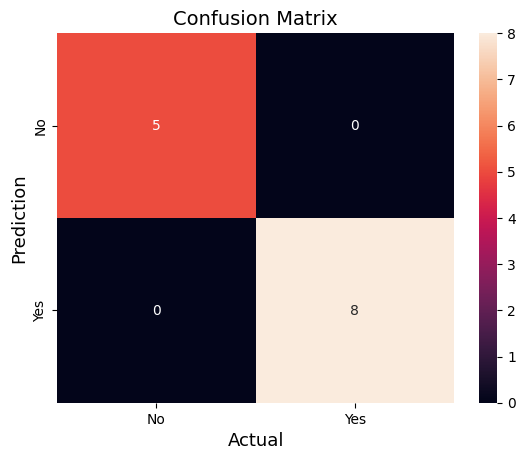

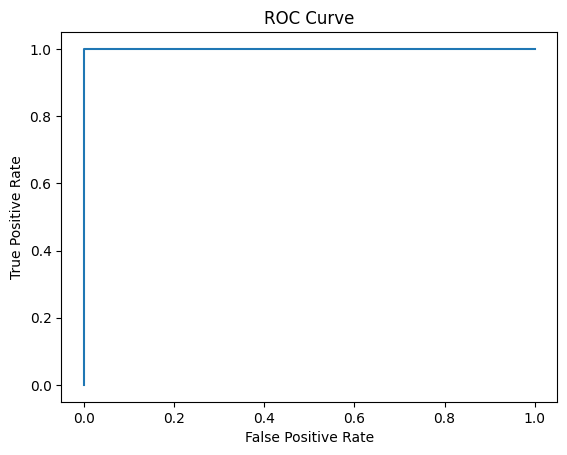

AUC: 100.0%
Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1: 100.0%


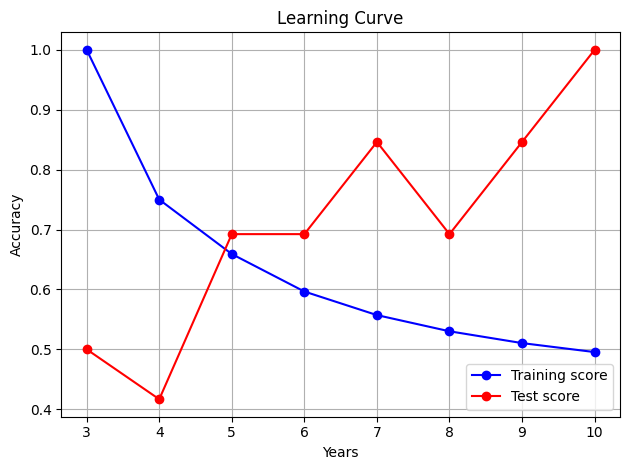

In [91]:
years = []
train_scores = []
test_scores = []

for year in df["year"].unique():
    if year < 3 or year > 10:
        continue

    print(f"---------------------- YEAR {year} ----------------------")

    classifier = copy.deepcopy(classifier)  # Reset classifier.
    result = ()
    if isinstance(classifier, ManualEnsemble):
        classifier.train(year)
        result = classifier.test(year)
    else:
        class_utils.train_model_simple(classifier, df, year, target)
        result = class_utils.test_model(classifier, df, year, target)

    (
        y_test_gt,
        y_test_prob,
        conf_test,
        y_train_gt,
        y_train_prob,
        conf_train,
    ) = result

    y_test_pred = class_utils.enforce_max_teams(y_test_prob, conf_test)
    y_train_pred = class_utils.enforce_max_teams(y_train_prob, conf_train)

    eval.model_score(y_test_gt, y_test_pred, y_test_prob, year == 10)

    years.append(year)
    test_scores.append(accuracy_score(y_test_gt, y_test_pred))
    train_scores.append(accuracy_score(y_train_gt, y_train_pred))

eval.plot_learning_curve(years, train_scores, test_scores)

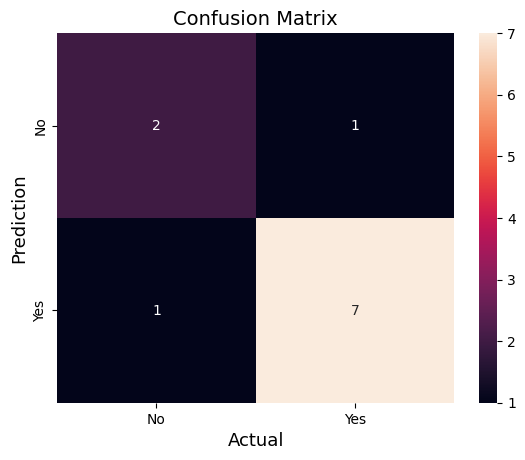

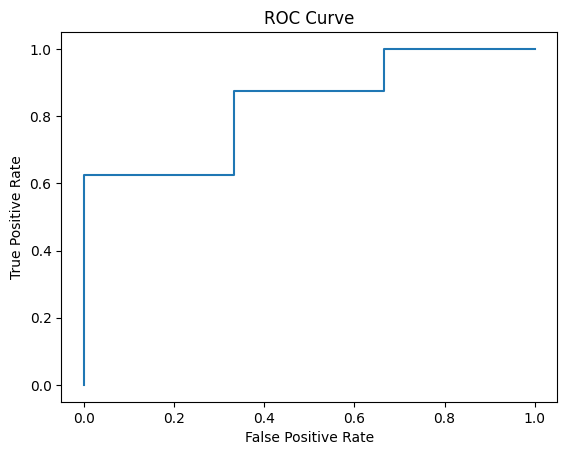

AUC: 83.33%
Accuracy: 81.82%
Precision: 87.5%
Recall: 87.5%
F1: 87.5%


In [92]:
if isinstance(classifier, ManualEnsemble):
    result = classifier.test(11)
else:
    result = class_utils.test_model(classifier, df, 11, target)

(
    y_test_gt,
    y_test_prob,
    conf_test,
    _,
    _,
    _,
) = result

y_test_pred = class_utils.enforce_max_teams(y_test_prob, conf_test)
y_train_pred = class_utils.enforce_max_teams(y_train_prob, conf_train)
eval.model_score(y_test_gt, y_test_pred, y_test_prob, True)